# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#F20574", "#020873", "#F29F05"] # Outras cores: #04D9D9 e #05F29B
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de dados

In [2]:
df = sns.load_dataset('tips')
df.to_csv('../data/raw/tips.csv', index = False)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos dados

![Tips com IA](https://i.ibb.co/9q4XPPv/tips-ia.webp)

O dataset "tips" é um conjunto de dados disponível na biblioteca Seaborn, que é frequentemente usado para análise exploratória de dados e para demonstrações em visualização de dados e modelagem estatística. Ele contém informações sobre **gorjetas recebidas por garçons em um restaurante durante um determinado período**.

Ele é amplamente utilizado na comunidade de ciência de dados e estatística, mas sua origem específica não é amplamente documentada nas fontes comuns de informação sobre datasets. Ele parece ter sido criado especificamente para fins educacionais, provavelmente derivado de dados coletados ou simulados para ilustração.

Esse dataset inclui variáveis como o total da conta, a gorjeta dada, etc. A variável dependente geralmente é a ``tip``, com as outras variáveis sendo usadas como preditoras.

### 2.1. Dicionário de dados

In [3]:
# Lendo o dicionário criado na atividade anterior
df_dicionario_tips = pd.read_csv('../data/external/dictionary.csv')
df_dicionario_tips

,variavel,descricao,tipo,subtipo
0,total_bill,total da conta em dólares,quantitativa,contínua
1,tip,valor da gorjeta em dólares,quantitativa,contínua
2,sex,sexo do pagante da conta,qualitativa,nominal
3,smoker,indica se o grupo incluía fumantes,qualitativa,nominal
4,day,dia da semana,qualitativa,ordinal
5,time,refeição (almoço ou jantar),qualitativa,nominal
6,size,tamanho do grupo,quantitativa,discreta


O dataset possui **7 variáveis**, sendo:
- 3 qualitativas nominais;
- 1 qualitativa ordinal;
- 2 quantitativas contínuas;
- 1 quantitativa discreta.

## 3. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Qual é a relação entre o valor total da conta e o valor da gorjeta?

### 3.1. Existem dados faltantes, se sim quantos e em quais variáveis?

In [4]:
# Verificando a quantidade de dados faltantes em cada coluna (variável)
dados_faltantes = df.isnull().sum()

dados_faltantes

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- Pela saída acima, nenhuma das colunas (variáveis) tem dados faltantes.

In [5]:
# Verificando se há linhas inteiras com dados faltantes
serie_linhas_faltantes = df.isnull().all(axis=1)

# Quantidade de linhas inteiras faltantes
qtd_linhas_faltantes = serie_linhas_faltantes.sum()
    
print(f"O número de linhas inteiras faltantes é: {qtd_linhas_faltantes}.")

O número de linhas inteiras faltantes é: 0.


- Já era de se esperar que também não haveria linhas inteiras faltantes já que não há dados faltantes.

### 3.2. Qual a distribuição dos dados (variável por variável)?

In [6]:
# Visualizando as estatísticas das colunas
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


----------------------------------------------------------------------------------------------

In [7]:
# Investigando quais são os 4 dias da semana da coluna "day"
dias_unicos = df.day.unique()
dias_unicos

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [8]:
# Explorando quais os 2 dias da semana com mais observações
df_day = df.day.value_counts().sort_values(ascending=False)
df_day[:2]

Sat    87
Sun    76
Name: day, dtype: int64

In [9]:
# Criando uma cópia do dataframe para investigar melhor as frequências do "tamanho" das meses
df_copy = df.copy()

# Transformando o tipo da coluna size para string
df_copy['size'] = df_copy['size'].astype(str)

# Contando as frequências dos tamanhos de mesa (que vai de 1 a 6)
contar_valores_size = df_copy['size'].value_counts().sort_values(ascending=False)
contar_valores_size.iloc[:1]

2    156
Name: size, dtype: int64

- O valor médio da conta (**total_bill**) é de aproximadamente ``$19.79``, variando de um mínimo de ``$3.07`` a um máximo de ``$50.81``;
- As gorjetas (**tip**) têm uma média de ``$2.99``, aproximadamente, com valores variando entre ``$1`` e ``$10``;
- Há uma predominância de pagantes do gênero (**sex**) masculino sobre o feminino. Há ``157`` homens pagantes;
- No quesito fumantes versus não fumantes (**smoker**), há uma maioria daqueles que não fumam: ``151``;
- O dia (**day**) com maior movimento é o *sábado*, com ``87`` linhas, seguido pelo *domingo*;
- O período (**time**) mais comum para as refeições é o *jantar (Dinner)*, que é mais frequente do que o *almoço (Lunch)* com ``176`` observações;
- Por fim, a média da quantidade de pessoas (**size**) é de ``2.6`` pessoas por mesa, sendo ``2`` pessoas a quantidade mais comum, com ``156`` aparições.

---------

#### 3.2.1. Distribuição das variáveis qualitativas

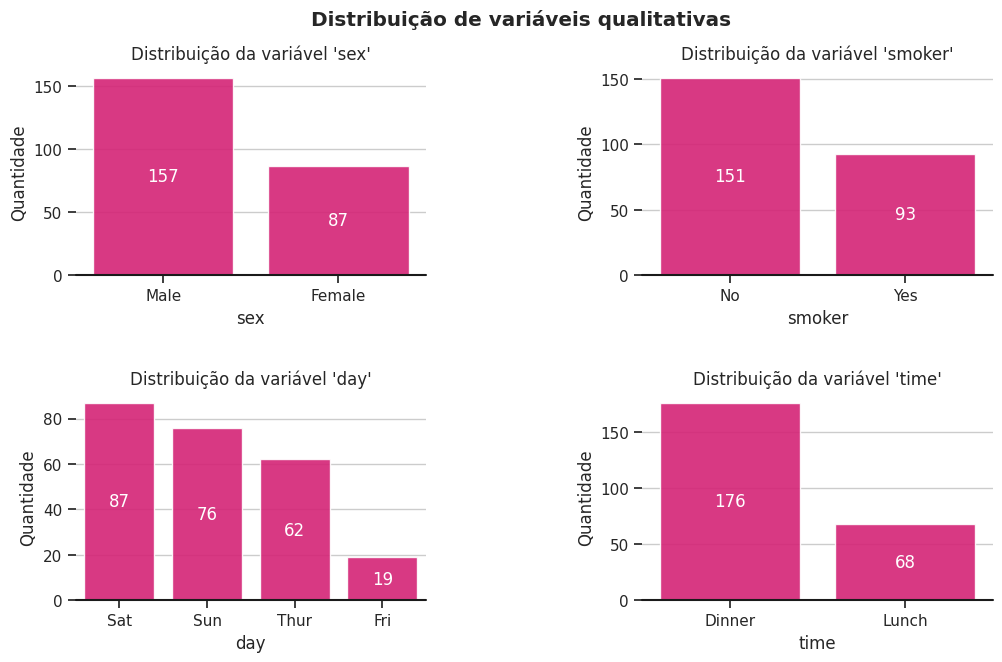

In [10]:
# Criando uma figura e um conjunto de subplots com 2 linhas e 2 colunas, com um tamanho específico de figura para variáveis qualitativas
fig, axes = plt.subplots(2, 2, figsize=(11,7))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='semibold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    
plt.show()

-----------

A partir dos gráficos acima podemos notar que:
- Há quase o ``dobro`` de homens pagante se comparado a mulheres;
- A quantidade de não fumantes é predominante, como visto antes, ``61.88%``;
- O dia menos "movimentado" é ``sexta-feira``;
- E a quantidade de observações em termos de **Dinner** (jantar) é quase ``3x`` a de **Lunch** (almoço).

#### 3.2.2. Distribuição das variáveis quantitativas

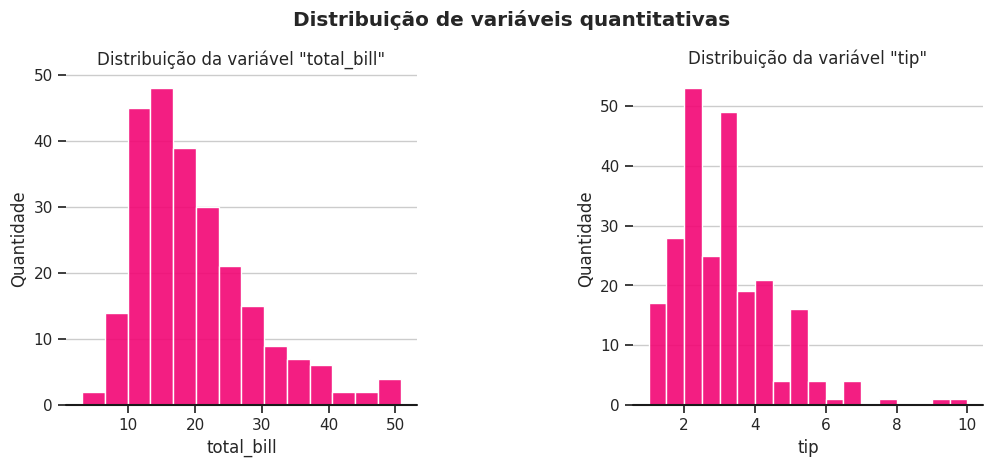

In [11]:
# Primeiro gráfico - Histogramas para variáveis quantitativas, excluindo 'size'
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='semibold')
for i, variavel in enumerate(df_dicionario_tips.query('tipo == "quantitativa" and variavel != "size"').variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color='k', clip_on=False)
    ax.set_title(f'Distribuição da variável "{variavel}"')
    ax.set_xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

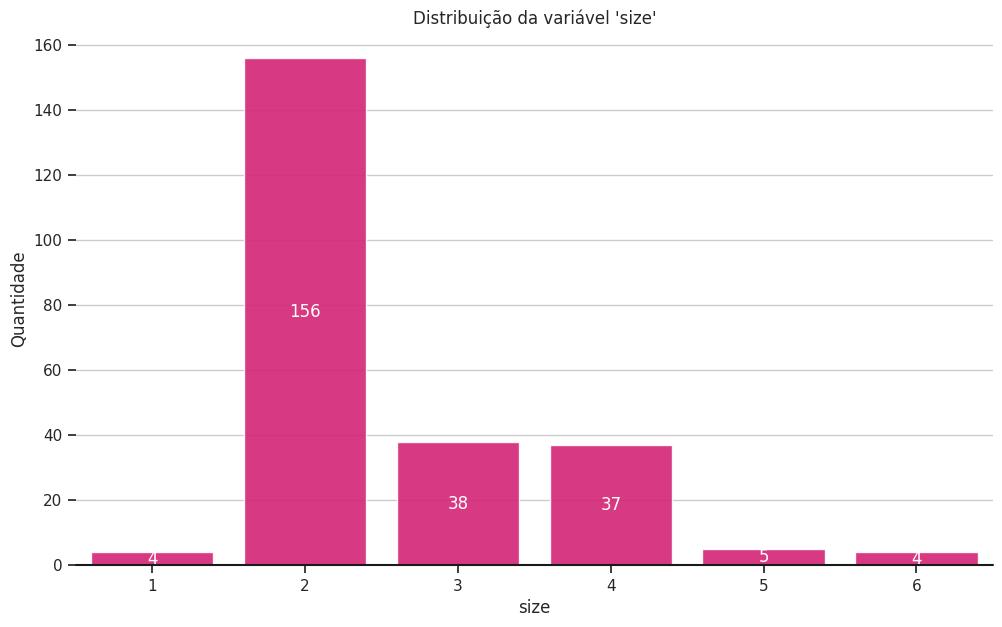

In [12]:
# Segundo gráfico (colunas) - Contagem para a variável 'size'
fig, ax = plt.subplots(figsize=(11, 7))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
for variavel in df_dicionario_tips.query("variavel == 'size'").variavel.to_list():
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=ax,
        color=colors[0],
        alpha=0.9,
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type= 'center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

A partir dos gráficos acima podemos notar que:
- A variável ``total bill`` se asemelha a uma distribuição assimétrica à direta com uma grande concentração de valores entre ``$10`` e ``$20``;
- Assim como a variável anterior, ``tip`` tem uma distribuição assimétrica à direita e grande concentração de valores entre ``$2`` e ``$3``;
- Por fim, o tamanho de mesas, ``size``, com ``2 pessoas`` quase o dobro se comparada aos outros 5 tamanhos somados.

### 3.3. Qual é a relação entre os dias da semana, o sexo do pagante com as variáveis total_bill e tip?

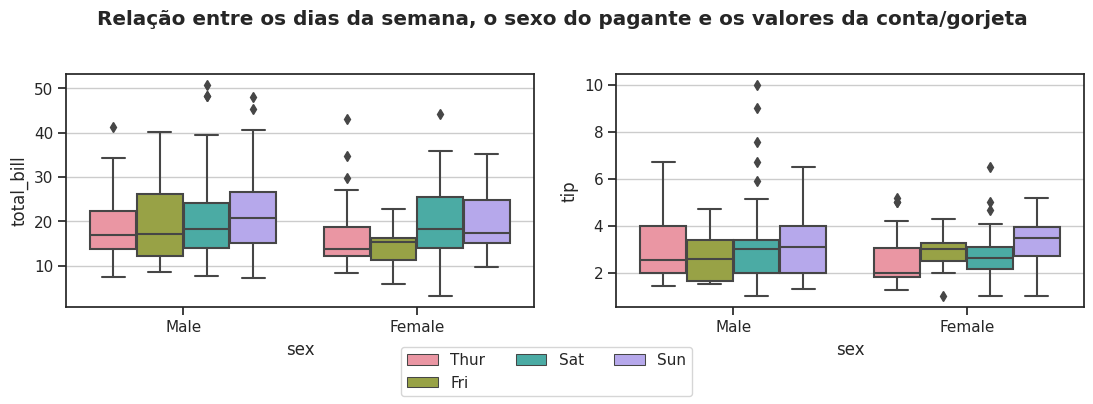

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, o sexo do pagante e os valores da conta/gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="sex", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

----------

- A variabilidade de `total_bill` e `tip` é maior quando olhamos para pagantes homens se comparado a mulheres;
- Em ambos os gêneros, a maior concentração de outliers de `tip` acontece aos sábados (`Sat`), indicando ser um bom dia para se ganhar gorjetas "fora do comum";
- Sexta-feira (`Fri`) é um dia que não há valores atípicos (outliers), nem em `total_bill`, nem `tip`.

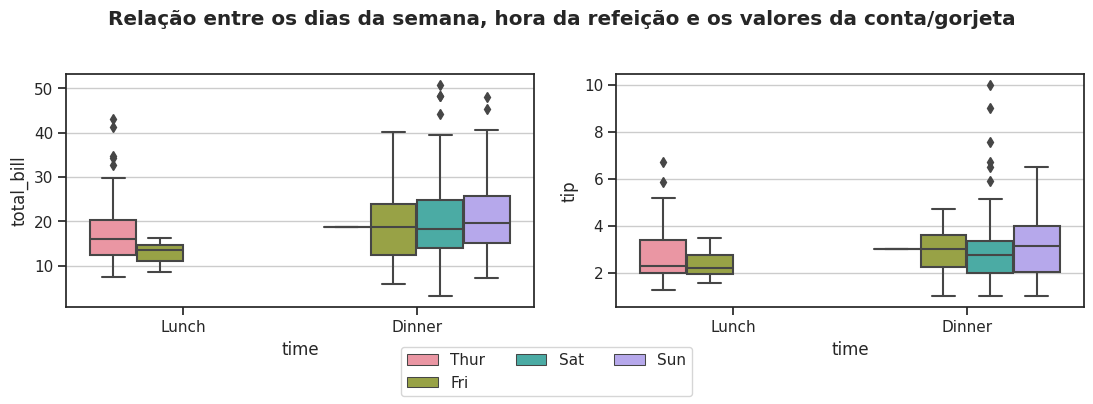

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, hora da refeição e os valores da conta/gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="time", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

- Quinta-feira (`Thur`) é o melhor dia tanto para se ganhar boas gorjetas no almoço (`Lunch`);
- Gorjetas atípicas (outliers) são mais comuns aos sábados (`Sat`) à noite (`Dinner`);
- Em relação às quintas à noite, não é um bom horário nem para contas nem para gorjetas.

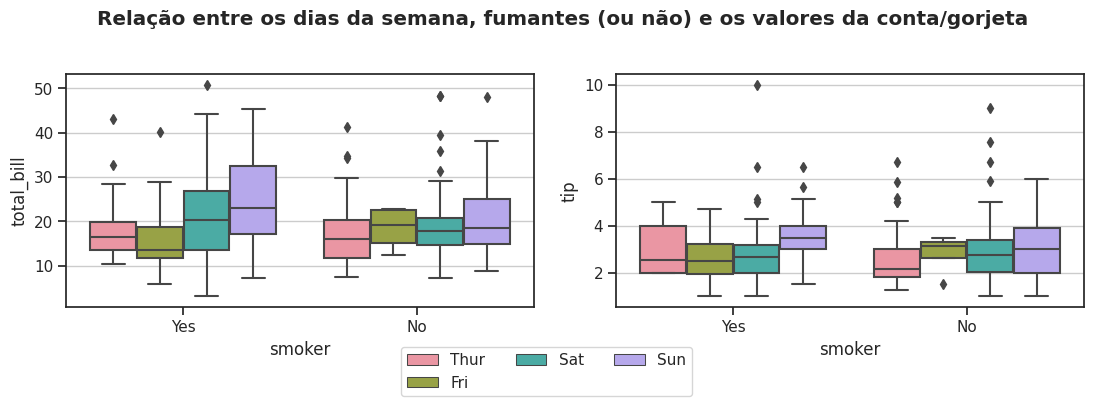

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, fumantes (ou não) e os valores da conta/gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="smoker", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

- O `total_bill` é maior e mais variável com clientes fumantes e aos fins de semana (`Sat` e `Sun`);
- Não há muita diferença na gorjeta dada por fumantes ou não fumantes, mas há uma diferença nos outliers: valores atípicos em não fumantes acontecem mais às quintas (`Thur`) e em fumantes é mais presente aos domingos (`Sun`);
- Sábado (`Sat`) continua sendo um ótimo dia para `tip` outliers.

In [16]:
# Mapeamento de valores: '1', '3', '4', '5', '6' -> 'other_sizes' e '2' -> 'pair' (mesas com 2)
replacement_map = {'1': 'Other_sizes', '3': 'Other_sizes', '4': 'Other_sizes', '5': 'Other_sizes', '6': 'Other_sizes', '2': 'Pair'}

# Aplicando o mapeamento
df_copy['size'] = df_copy['size'].replace(replacement_map)

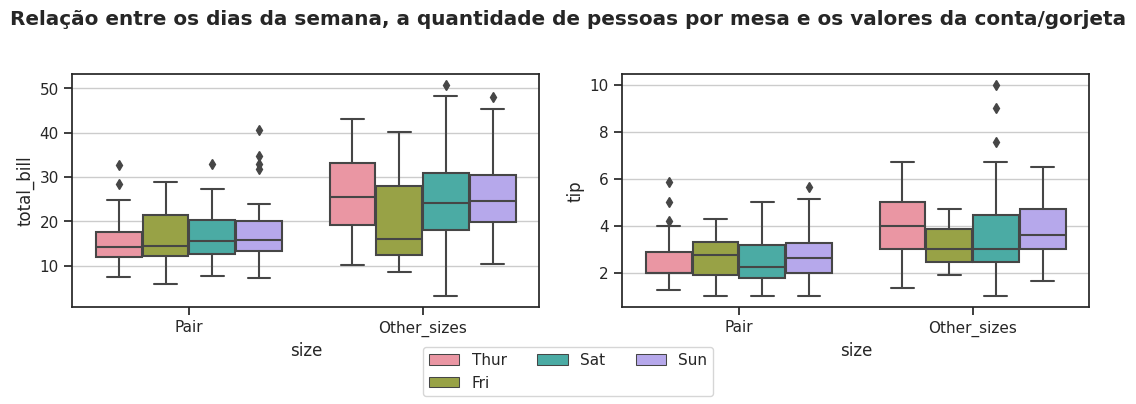

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, a quantidade de pessoas por mesa e os valores da conta/gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="size", 
        y=variavel, 
        hue="day", 
        data=df_copy, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

- Depois de agrupar o `size` em **Pair (size = 2)** versus **Other_sizes (o restante)**, percebemos que, em média, o segundo grupo tem maiores valores de conta (`total_bill`) e de gorjeta (`tip`);
- Além disso, os maiores outliers de `tip` estão no grupo `Other_sizes`, aos sábados (`Sat`).

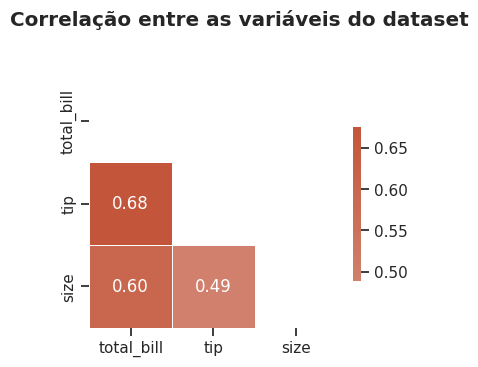

In [18]:
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(4,4))
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre as variáveis do dataset", fontweight='bold')
plt.show()

> Em ambos os cenários, há **moderada correlação positiva** (valores entre 0,3 e 0,7). Com destaque para a correlação entre `total_bill` e `tip`, que é de `0.68`.

/home/matheusvazdata/.cache/pypoetry/virtualenvs/src-6r3AcA19-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


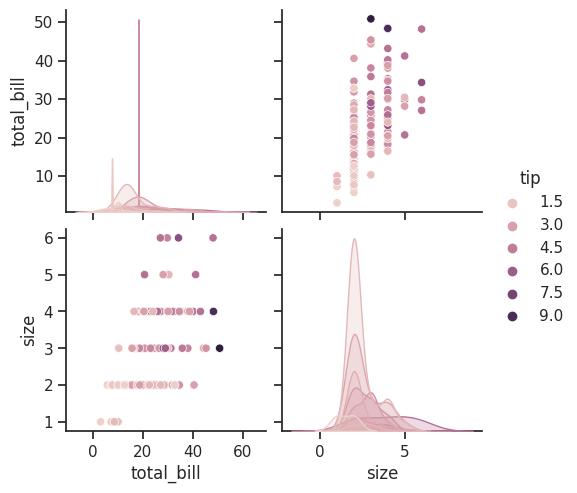

In [19]:
sns.pairplot(df, hue="tip")
plt.show()

- **Relação entre `total_bill` e `size`**: Os pontos sugerem que há uma tendência positiva, significando que contas maiores tendem a estar associadas a grupos maiores (maior valor de `size`). No entanto, essa relação não parece muito forte, pois há bastante dispersão nos dados;
- **Influência da Gorjeta**: Os diferentes tons de cor dos pontos indicam que valores maiores de gorjeta tendem a acompanhar contas maiores.

## 4. Insights

- **Gênero dos Clientes**:
    - A maioria dos clientes pagantes são do gênero masculino (157), enquanto uma minoria é do gênero feminino (87).
- **Fumantes e Não Fumantes**:
    - Há mais clientes não fumantes (151) do que fumantes (93) neste conjunto de dados.
- **Dias da Semana**:
    - Sábado é o dia com o maior número de registros (87), seguido de domingo (76) e quinta-feira (62). Sexta-feira tem a menor quantidade de registros (19).
- **Horários das Refeições**:
    - O jantar (Dinner) é a refeição mais comum entre os clientes, com 176 registros, em comparação com 68 registros para o almoço (Lunch).
- **Distribuição da Gorjeta**:
    - A gorjeta varia de `$1,00` a `$10,00`, com uma média de aproximadamente `$3,00`. Isso indica que a maioria das gorjetas está perto da média, mas também há algumas grandes gorjetas, que podem ser consideradas outliers.
    - A variabilidade da gorjeta é significativa, com um desvio padrão de cerca de `$1,38`. Isso sugere que o valor da gorjeta pode variar bastante entre os clientes.
- **Gorjetas de Fumantes vs. Não Fumantes**:
    - As médias de gorjetas são quase idênticas entre fumantes e não fumantes, indicando que o fato de ser fumante ou não pode não ter um impacto significativo no valor da gorjeta deixada.
- **Gorjetas por Tamanho do Grupo**:
    - O valor médio da gorjeta tende a aumentar com o tamanho do grupo. Grupos de 1 têm uma média de gorjeta de cerca de `$1,44`, enquanto grupos de 6 deixam uma média de cerca de `$5,23`.
- **Correlações**:
    - Existe uma correlação positiva moderada entre a conta total (total_bill) e a gorjeta (tip), com um coeficiente de correlação de 0,68. Isso sugere que, em geral, quanto maior a conta, maior é a gorjeta.
    - Também há uma correlação positiva entre o tamanho do grupo (size) e a conta total, com um coeficiente de 0,60, indicando que grupos maiores tendem a ter contas mais altas.

In [20]:
variabilidade = {
    'variancia': df['tip'].var(),
    'desvio_padrao': df['tip'].std(),
}

round(variabilidade['desvio_padrao'], 2)

1.38

In [21]:
df.query('size == 1')['tip'].mean()

1.4375

In [22]:
df.query('size == 6')['tip'].mean()

5.225